In [1]:
! pip install pymc3

  Using cached scipy-1.7.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (39.9 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.1
    Uninstalling scipy-1.11.1:
      Successfully uninstalled scipy-1.11.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.4.20 requires scipy>=1.9, but you have scipy 1.7.3 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../../../../datasets/parte1/dataset_cleaned.csv')

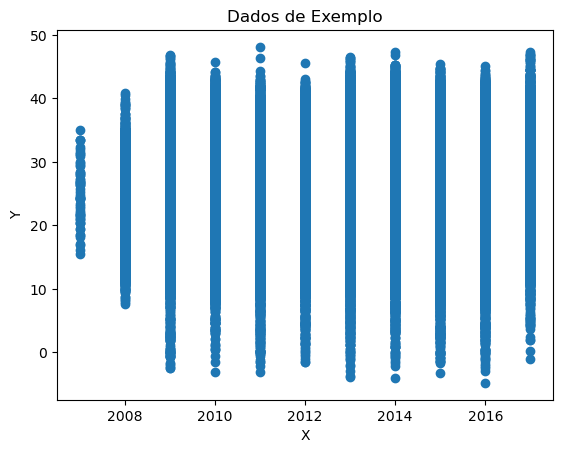

In [4]:
plt.scatter(df['Year'], df['MaxTemp'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dados de Exemplo')
plt.show()

In [5]:
with pm.Model() as model:
    # Coeficientes e intercepto
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10)
    sigma = pm.HalfNormal('sigma', sd=1)

    # Modelo linear
    mu = alpha + beta * df['Year']

    # Likelihood
    likelihood = pm.Normal('MaxTemp', mu=mu, sd=sigma, observed=df['MaxTemp'])

    # Inferência
    trace = pm.sample(1000, tune=1000)

/home/goncalo/miniconda3/envs/daa310/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]


/home/goncalo/miniconda3/envs/daa310/lib/python3.10/site-packages/pymc3/step_methods/hmc/quadpotential.py:220: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(1, self._stds, out=self._inv_stds)
/home/goncalo/miniconda3/envs/daa310/lib/python3.10/site-packages/pymc3/step_methods/hmc/quadpotential.py:199: RuntimeWarning: invalid value encountered in multiply
  return np.multiply(self._var, x, out=out)


RuntimeError: Chain 2 failed.

In [ ]:
pm.traceplot(trace)
plt.show()

# Sumário estatístico dos parâmetros
print(pm.summary(trace))

# Visualizar a regressão
plt.scatter(df['Year'], df['MaxTemp'], label='Dados Observados')
plt.xlabel('Year')
plt.ylabel('MaxTemp')

for alpha_, beta_ in zip(trace['alpha'][::50], trace['beta'][::50]):
    plt.plot(df['MaxTemp'], alpha_ + beta_ * df['X'], color='gray', alpha=0.1)

plt.title('Regressão Bayesiana')
plt.legend()
plt.show()